# Project 02 - Image Processing

## Student Information

- Full name: Lê Thanh Tâm
- Student ID: 22127374
- Class: 22CLC04

## Required Libraries

In [37]:
# IMPORT YOUR LIBS HERE
import numpy as np #type: ignore
import matplotlib.pyplot as plt #type: ignore
from PIL import Image

## Function Definitions

In [38]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    img = Image.open(img_path) 
    return np.asarray(img)


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    
    plt.imshow(img)

    
def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img = Image.fromarray(img)
    img.save(img_path)

#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def brightness_img(img, alpha):
    '''
    Adjust the brightness of an image

    Parameters
    ----------
    img : <your type>
        Image
    alpha : float
        Brightness level (0 <= alpha <= 255)
    
    Returns 
    '''    
    
    # YOUR CODE HERE
    img = img + alpha
    img = np.clip(img, 0, 255)
    return img.astype(np.uint8)

def contrast_img(img, beta):
    '''
    Adjust the contrast of an image

    Parameters
    ----------
    img : <your type>
        Image
    beta : float
        Contrast level (0 <= beta <= 1)

    Returns
    '''

    # YOUR CODE HERE
    img = img * beta
    img = np.clip(img, 0, 255)
    return img.astype(np.uint8)

def flip_horizontal_img(img):
    '''
    Flip an image horizontally

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    '''

    # YOUR CODE HERE
    return np.flip(img, axis=1)

def flip_vertical_img(img):
    ''' 
    Flip an image vertically

    Parameters
    ----------
    img : <your type>
        Image
    
    Returns
    '''

    # YOUR CODE HERE
    return np.flip(img, axis=0)

def grayscale_img(img):
    ''' 
    Convert an image to grayscale

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    '''

    # YOUR CODE HERE
    if img.shape[-1] == 4:  # Nếu ảnh có kênh alpha
        img = img[..., :3]  # Loại bỏ kênh alpha
    gray = np.dot(img[..., :3], [0.299, 0.587, 0.114])  # Công thức chuyển đổi RGB sang Grayscale
    return gray.astype(np.uint8)

def sepia_img(img):
    '''
    Convert an image to sepia

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    '''

    # YOUR CODE HERE
    img = grayscale_img(img)
    img = np.stack([img * 0.393 + img * 0.769 + img * 0.189, 
                    img * 0.349 + img * 0.686 + img * 0.168, 
                    img * 0.272 + img * 0.534 + img * 0.131], axis=-1)
    img = np.clip(img, 0, 255)
    return img.astype(np.uint8)

def blur_img(img, alpha):
    '''
    Apply blur effect to an image

    Parameters
    ----------
    img : <your type>
        Image
    alpha : float
        Blur level (0 <= alpha <= 1)

    Returns
    '''

    # Điều chỉnh kích thước kernel dựa trên alpha
    kernel_size = int(3 / alpha)
    if kernel_size % 2 == 0:
        kernel_size += 1
    
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    return apply_kernel(img, kernel).astype(np.uint8)

def box_blur_img(img):
    ''' 
    Apply box blur effect to an image
    
    Parameters
    ----------
    img : <your type>
        Image

    Returns
    '''

    # Tạo kernel box blur (3x3)
    kernel = np.ones((3, 3)) / 9.0
    return apply_kernel(img, kernel).astype(np.uint8)

def gaussian_blur_3x3_img(img):
    '''
    Apply Gaussian blur effect to an image

    Parameters
    ----------
    img : <your type>
        Image
    
    Returns
    '''

    # Tạo kernel Gaussian blur (3x3)
    kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]]) / 16.0
    return apply_kernel(img, kernel).astype(np.uint8)

def gaussian_blur_5x5_img(img):
    '''
    Apply Gaussian blur effect to an image

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    '''

    # Tạo kernel Gaussian blur (5x5)
    kernel = np.array([[1,  4,  6,  4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1,  4,  6,  4, 1]]) / 256.0
    return apply_kernel(img, kernel).astype(np.uint8)

def sharpen_img(img):
    '''
    Apply sharpening effect to an image

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    '''
    
    # Tạo kernel làm sắc nét (sharpening kernel)
    kernel = np.array([[ 0, -1,  0],
                       [-1,  5, -1],
                       [ 0, -1,  0]])
    
    # Áp dụng kernel lên ảnh
    sharpened = apply_kernel(img, kernel)
    
    # Đảm bảo giá trị pixel nằm trong khoảng [0, 255]
    sharpened = np.clip(sharpened, 0, 255)
    
    return sharpened.astype(np.uint8)


def crop_circle_img(img):
    ''' 
    Crop a circle in the center of an image

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    '''

    # Lấy chiều cao và chiều rộng của ảnh
    height, width = img.shape[:2]

    # Tạo một mặt nạ hình tròn
    center_y, center_x = height // 2, width // 2
    radius = min(center_y, center_x)
    Y, X = np.ogrid[:height, :width]
    dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

    mask = dist_from_center <= radius

    # Áp dụng mặt nạ lên ảnh
    if img.ndim == 3:
        circular_img = np.zeros_like(img)
        for i in range(3):  # Lặp qua các kênh màu R, G, B
            circular_img[..., i] = img[..., i] * mask
    elif img.ndim == 2:
        circular_img = img * mask

    return circular_img

def crop_ellipse_img(img):
    ''' 
    Crop an ellipse in the center of an image

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    '''

    # Lấy chiều cao và chiều rộng của ảnh
    height, width = img.shape[:2]

    # Tạo mặt nạ cho hai hình elip
    center = (width //2, height //2 )
    axes1 = (width //2, height //2)  # Trục chính và trục phụ của elip thứ nhất
    axes2 = (width //2, height //2)  # Trục chính và trục phụ của elip thứ hai
    angle1 = 30  # Góc nghiêng của elip thứ nhất
    angle2 = 60 # Góc nghiêng của elip thứ hai

    mask1 = create_ellipse_mask((height, width), center, axes1, angle1)
    mask2 = create_ellipse_mask((height, width), center, axes2, angle2)

    combined_mask = mask1 | mask2

    # Áp dụng mặt nạ lên ảnh
    if img.ndim == 3:
        elliptical_img = np.zeros_like(img)
        for i in range(3):  # Lặp qua các kênh màu R, G, B
            elliptical_img[..., i] = img[..., i] * combined_mask
    elif img.ndim == 2:
        elliptical_img = img * combined_mask

    return elliptical_img

def zoom_in_img(img, zoom_factor):
    '''
    Zoom in an image using bilinear interpolation with NumPy

    Parameters
    ----------
    img : ndarray
        Input image
    zoom_factor : float
        Zoom factor (> 1)

    Returns
    -------
    ndarray
        Zoomed image
    '''
    height, width = img.shape[:2]
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    
    # Tạo mảng để lưu trữ ảnh đã phóng to
    zoomed_img = np.zeros((new_height, new_width, img.shape[2]), dtype=img.dtype)
    
    # Tạo các tọa độ gốc tương ứng cho ảnh đã phóng to
    row_scale = height / new_height
    col_scale = width / new_width
    rows = np.arange(new_height) * row_scale
    cols = np.arange(new_width) * col_scale

    # Tạo các tọa độ nguyên và trọng số nội suy
    rows_floor = np.floor(rows).astype(int)
    cols_floor = np.floor(cols).astype(int)
    rows_ceil = np.minimum(rows_floor + 1, height - 1)
    cols_ceil = np.minimum(cols_floor + 1, width - 1)
    
    row_weights = rows - rows_floor
    col_weights = cols - cols_floor
    
    # Áp dụng nội suy bilinear cho mỗi kênh màu
    for k in range(img.shape[2]):
        # Lấy các giá trị của 4 điểm xung quanh
        Q11 = img[rows_floor[:, None], cols_floor, k]
        Q12 = img[rows_floor[:, None], cols_ceil, k]
        Q21 = img[rows_ceil[:, None], cols_floor, k]
        Q22 = img[rows_ceil[:, None], cols_ceil, k]
        
        # Tính toán giá trị pixel của ảnh phóng to
        zoomed_img[:, :, k] = (Q11 * (1 - row_weights[:, None]) * (1 - col_weights) +
                               Q12 * (1 - row_weights[:, None]) * col_weights +
                               Q21 * row_weights[:, None] * (1 - col_weights) +
                               Q22 * row_weights[:, None] * col_weights)

    return np.clip(zoomed_img, 0, 255).astype(np.uint8)

def zoom_out_img(img, zoom_factor):
    '''
    Zoom out an image

    Parameters
    ----------
    img : <your type>
        Image
    zoom_factor : float
        Zoom factor (0 < zoom_factor < 1)

    Returns
    '''

    height, width = img.shape[:2]
    new_height, new_width = int(height / zoom_factor), int(width / zoom_factor)
    
    # Create an empty array for the zoomed-out image
    zoomed_out_img = np.zeros((new_height, new_width, img.shape[2]), dtype=img.dtype)
    
    for i in range(new_height):
        for j in range(new_width):
            # Find the coordinates in the original image
            orig_i_start = int(i * zoom_factor)
            orig_i_end = int((i + 1) * zoom_factor)
            orig_j_start = int(j * zoom_factor)
            orig_j_end = int((j + 1) * zoom_factor)
            
            # Extract the block of pixels to be averaged
            block = img[orig_i_start:orig_i_end, orig_j_start:orig_j_end]
            
            # Calculate the average for each channel
            for k in range(img.shape[2]):
                zoomed_out_img[i, j, k] = np.mean(block[:, :, k])
    
    return zoomed_out_img

# ADDITIONAL FUNCTIONS HERE 
def apply_kernel(img, kernel):
    '''
    Áp dụng kernel lên ảnh

    Parameters
    ----------
    img : <your type>
        Image 
    kernel : <your type>
        Kernel

    Returns
    -------
        Ảnh sau khi áp dụng kernel
    '''

    # Lấy kích thước ảnh và kernel
    height, width = img.shape[:2]
    k_height, k_width = kernel.shape
    
    # Tạo ảnh kết quả với kích thước ban đầu
    result = np.zeros_like(img).astype(np.float32)
    
    # Pad ảnh để xử lý biên
    pad_height = k_height // 2
    pad_width = k_width // 2
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='reflect')
    
    # Áp dụng kernel lên mỗi kênh màu của ảnh
    for i in range(height):
        for j in range(width):
            for k in range(img.shape[2]):
                # Lấy vùng ảnh con tương ứng
                region = padded_img[i:i + k_height, j:j + k_width, k]
                # Tính tổng tích chập
                result[i, j, k] = np.sum(region * kernel)
                
    return result

def crop_center_img(img, new_height, new_width):
    '''
    Crop the center of an image

    Parameters
    ----------
    img : <your type>
        Image
    new_height : int
        Height of the cropped image
    new_width : int
        Width of the cropped image

    Returns
    '''

    # YOUR CODE HERE
    y, x = img.shape[:2]
    startx = x//2-(new_width//2)
    starty = y//2-(new_height//2)    
    return img[starty:starty+new_height, startx:startx+new_width]

def create_ellipse_mask(shape, center, axes, angle):
    '''
    Tạo mặt nạ hình elip

    Parameters
    ----------
    shape : tuple
        Kích thước của ảnh
    center : tuple
        Tọa độ tâm của elip
    axes : tuple
        Độ dài trục chính và trục phụ của elip
    angle : float
        Góc nghiêng của elip

    Returns
    -------
        Mặt nạ hình elip
    '''

    a, b = axes
    theta = np.radians(angle)
    Y, X = np.ogrid[:shape[0], :shape[1]]
    xc, yc = center

    x = X - xc
    y = Y - yc

    cos2_theta = np.cos(2 * theta)
    sin2_theta = np.sin(2 * theta)
    sin2_2theta = np.sin(2 * theta)**2

    ellipse_mask = ((x**2 / (a**2 * sin2_2theta)) +
                    (y**2 / (b**2 * sin2_2theta)) +
                    (2 * cos2_theta * x * y / (a * b * sin2_2theta))) <= 1
    return ellipse_mask


<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [39]:
# YOUR CODE HERE
# img = read_img('512.jpg')
# print("Thay đổi độ sáng của ảnh: ")
# alpha = float(input("Nhập giá trị độ sáng (0 <= alpha <= 255): "))
# bright_img = brightness(img, alpha)
# save_img(bright_img, 'bright_img.png')
# show_img(bright_img)
#gray_img = np.mean(img, axis=2, keepdims=True)

# gray = Image.fromarray(img).convert('L')
# plt.imshow(gray, cmap='gray')
# gray.save('gray.png')

# alpha = 5
# bright_img = brightness(img, alpha)
# show_img(bright_img) # Show the brightened image
# save_img(bright_img, 'bright_img.png') # Save the bright

# beta = 1.5
# cont_img = contrast(img, beta)
# show_img(cont_img) # Show the brightened image
# save_img(cont_img, 'cont_img.png') # Save the bright

# flip_h_img = flip_horizontal(img)
# show_img(flip_h_img) # Show the brightened image
# save_img(flip_h_img, 'flip_h_img.png') # Save the bright

# flip_v_img = flip_vertical(img)
# show_img(flip_v_img) # Show the brightened image
# save_img(flip_v_img, 'flip_v_img.png') # Save the bright

#gray_img = grayscale_img(img)
# save_img(gray_img, 'gray_img.png')

# sepia = sepia_img(img)
# show_img(sepia)
# save_img(sepia, 'sepia_img.png')

# img = read_img('lena.png')
# blur = blur_img(img, 0.5)
# show_img(blur)
# save_img(blur, 'blur_img.png')
# gray = grayscale_img(img)
# blur = blur_img(gray, 1)
# save_img(blur, 'blur_img.png')

# img = read_img('lena.png')
# blur = gaussian_blur_5x5(img)
# save_img(blur, 'blur_img.png')

# crop = crop_center_img(img, 200, 200)
# save_img(crop, 'crop_img.png')

# circle = crop_circle_img(img)
# save_img(circle, 'circle_img.png')

# ellipse = crop_ellipse_img(img)
# show_img(ellipse)
# save_img(ellipse, 'ellipse_img.png')

# img = read_img('lena.png')
# contrast_img = contrast(img, 1.5)
# show_img(contrast_img)
# save_img(contrast_img, 'contrast_img.png')

# zoom_out = zoom_out_img(img, 2)
# save_img(zoom_out, 'zoom_out_img.png')

# Image.open('lena.png').show()



## Main FUNCTION

In [40]:
# YOUR CODE HERE
def option_one(img):
    print("Thay đổi độ sáng của ảnh: ")
    alpha = float(input("Nhập giá trị độ sáng: "))
    bright_img = brightness_img(img, alpha)
    save_img(bright_img, 'bright_img.png')
    show_img(bright_img)

def option_two(img):
    print("Thay đổi độ tương phản của ảnh: ")
    beta = float(input("Nhập giá trị độ tương phản: "))
    cont_img = contrast_img(img, beta)
    show_img(cont_img)
    save_img(cont_img, 'contrast_img.png')

def option_three_1(img):    
    print("Lật ảnh theo chiều ngang: ")
    flip_h_img = flip_horizontal_img(img)
    show_img(flip_h_img)
    save_img(flip_h_img, 'flip_h_img.png')

def option_three_2(img):
    print("Lật ảnh theo chiều dọc: ")
    flip_v_img = flip_vertical_img(img)
    show_img(flip_v_img)
    save_img(flip_v_img, 'flip_v_img.png')

def option_four_1(img):
    print("Chuyển đổi ảnh RGB thành ảnh xám: ")
    gray_img = grayscale_img(img)
    show_img(gray_img)
    save_img(gray_img, 'gray_img.png')

def option_four_2(img):
    print("Chuyển đổi ảnh RGB thành ảnh sepia: ")
    sepia = sepia_img(img)
    show_img(sepia)
    save_img(sepia, 'sepia_img.png')

def option_five_1(img):
    print("Áp dụng hiệu ứng mờ cho ảnh: ")
    blur_choice = input("Chọn loại hiệu ứng mờ: '1' - Box Blur, '2' - Gaussian Blur 3x3, '3' - Gaussian Blur 5x5: ")
    if blur_choice == '1':
        blur = box_blur_img(img)
    elif blur_choice == '2':
        blur = gaussian_blur_3x3_img(img)
    elif blur_choice == '3':
        blur = gaussian_blur_5x5_img(img)
    else:
        print("Lựa chọn không hợp lệ. Vui lòng thử lại.")
    show_img(blur)
    save_img(blur, 'blur_img.png')

def option_five_2(img):
    print("Áp dụng hiệu ứng sắc nét cho ảnh: ")
    sharpen = sharpen_img(img)
    show_img(sharpen)
    save_img(sharpen, 'sharpen_img.png')

def option_six(img):
    print('Cắt ảnh theo kích thước (ảnh ở trung tâm): ')
    new_height = int(input('Nhập chiều cao mới: '))
    new_width = int(input('Nhập chiều rộng mới: '))
    crop = crop_center_img(img, new_height, new_width)
    show_img(crop)
    save_img(crop, 'crop_img.png')

def option_seven_1(img):
    print("Cắt ảnh theo hình tròn: ")
    circle = crop_circle_img(img)
    show_img(circle)
    save_img(circle, 'circle_img.png')

def option_seven_2(img):
    print("Cắt ảnh theo hình elip: ")
    ellipse = crop_ellipse_img(img)
    show_img(ellipse)
    save_img(ellipse, 'ellipse_img.png')

def option_eight_1(img):
    print('Phóng to ảnh: ')
    zoom_factor = float(input('Nhập hệ số phóng to (> 1): '))
    zoom_in = zoom_in_img(img, zoom_factor)
    show_img(zoom_in)
    save_img(zoom_in, 'zoom_in_img.png')

def option_eight_2(img):
    print('Thu nhỏ ảnh: ')
    zoom_factor = float(input('Nhập hệ số thu nhỏ (> 1): '))
    zoom_out = zoom_out_img(img, zoom_factor)
    show_img(zoom_out)
    save_img(zoom_out, 'zoom_out_img.png')

def option_nine():
    print("Thoát...")
    return

def main():
    path = input("Nhập đường dẫn ảnh: ")
    img = read_img(path)

    while True:
        print("\nMenu:")
        print("0. Thực hiện tất cả các chức năng")
        print("1. Thay đổi độ sáng của ảnh")
        print("2. Thay đổi độ tương phản của ảnh")
        print("3. Lật ảnh theo chiều ngang hoặc dọc")
        print("4. Chuyển đổi ảnh RGB thành ảnh xám hoặc ảnh sepia")
        print("5. Áp dụng hiệu ứng mờ hoặc sắc nét cho ảnh")
        print("6. Cắt ảnh theo kích thước (ảnh ở trung tâm)")
        print("7. Cắt ảnh theo hình tròn hoặc hình elip")
        print("8. Phóng to hoặc thu nhỏ ảnh")
        print("9. Thoát")
        
        choice = input("Enter your choice: ")
        
        if choice == '0':
            option_one(read_img(path))
            option_two(read_img(path))
            option_three_1(read_img(path))
            option_three_2(read_img(path))
            option_four_1(read_img(path))
            option_four_2(read_img(path))
            option_five_1(read_img(path))
            option_five_2(read_img(path))
            option_six(read_img(path))
            option_seven_1(read_img(path))
            option_seven_2(read_img(path))
            option_eight_1(read_img(path))
            option_eight_2(read_img(path))
            option_nine()
            break
        if choice == '1':
            option_one(read_img(path))
        elif choice == '2':
            option_two(read_img(path))
        elif choice == '3':
            print("1. Lật ảnh theo chiều ngang hay chieu dọc?")
            flip_choice = input("Chọn: ")
            if flip_choice == '1':
                option_three_1(read_img(path))
            elif flip_choice == '2':
                option_three_2(read_img(path))
            else:
                print("Lựa chọn không hợp lệ. Vui lòng thử lại.")
        elif choice == '4':
            print("1. Chuyển đổi ảnh RGB thành ảnh xám hay ảnh sepia?")
            gray_choice = input("Chọn: ")
            if gray_choice == '1':
                option_four_1(read_img(path))
            elif gray_choice == '2':
                option_four_2(read_img(path))
            else:
                print("Lựa chọn không hợp lệ. Vui lòng thử lại.")
        elif choice == '5':
            print("1. Áp dụng hiệu ứng mờ hay sắc nét cho ảnh?")
            blur_choice = input("Chọn: ")
            if blur_choice == '1':
                option_five_1(read_img(path))
            elif blur_choice == '2':
                option_five_2(read_img(path))
            else:
                print("Lựa chọn không hợp lệ. Vui lòng thử lại.")
        elif choice == '6':
            option_six(read_img(path))
        elif choice == '7':
            print("1. Cắt ảnh theo hình tròn hay hình elip?")
            crop_choice = input("Chọn: ")
            if crop_choice == '1':
                option_seven_1(read_img(path))
            elif crop_choice == '2':
                option_seven_2(read_img(path))
            else:
                print("Lựa chọn không hợp lệ. Vui lòng thử lại.")
        elif choice == '8':
            print("1. Phóng to ảnh hay thu nhỏ ảnh?")
            zoom_choice = input("Chọn: ")
            if zoom_choice == '1':
                option_eight_1(read_img(path))
            elif zoom_choice == '2':
                option_eight_2(read_img(path))
            else:
                print("Lựa chọn không hợp lệ. Vui lòng thử lại.")
        elif choice == '9':
            option_nine()
            break
        else:
            print("Lựa chọn không hợp lệ. Vui lòng thử lại.")



Menu:
0. Thực hiện tất cả các chức năng
1. Thay đổi độ sáng của ảnh
2. Thay đổi độ tương phản của ảnh
3. Lật ảnh theo chiều ngang hoặc dọc
4. Chuyển đổi ảnh RGB thành ảnh xám hoặc ảnh sepia
5. Áp dụng hiệu ứng mờ hoặc sắc nét cho ảnh
6. Cắt ảnh theo kích thước (ảnh ở trung tâm)
7. Cắt ảnh theo hình tròn hoặc hình elip
8. Phóng to hoặc thu nhỏ ảnh
9. Thoát
Thay đổi độ sáng của ảnh: 
Thay đổi độ tương phản của ảnh: 
Lật ảnh theo chiều ngang: 
Lật ảnh theo chiều dọc: 
Chuyển đổi ảnh RGB thành ảnh xám: 
Chuyển đổi ảnh RGB thành ảnh sepia: 
Áp dụng hiệu ứng mờ cho ảnh: 
Áp dụng hiệu ứng sắc nét cho ảnh: 
Cắt ảnh theo kích thước (ảnh ở trung tâm): 
Cắt ảnh theo hình tròn: 
Cắt ảnh theo hình elip: 
Phóng to ảnh: 
Thu nhỏ ảnh: 
Thoát...


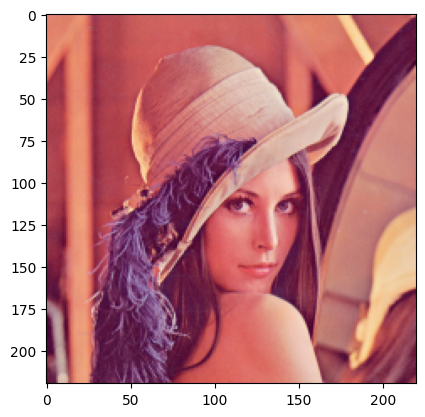

In [41]:
# Call main function
if __name__ == "__main__":
    main()